In [1]:
%matplotlib inline
import pylab as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings;warnings.simplefilter('ignore')

## 数据获取

In [2]:
import tushare as ts
import numpy as np
import pandas as pd 

In [3]:
hs300 = ts.get_k_data('hs300', '2013-01-01', '2016-06-25')     #训练集数据
hs300.head()

,date,open,close,high,low,volume,code
0,2013-01-04,2551.81,2524.41,2558.53,2498.89,97988182.0,hs300
1,2013-01-07,2518.05,2535.99,2545.97,2511.60,75167993.0,hs300
2,2013-01-08,2534.65,2525.33,2540.51,2502.49,71837100.0,hs300
3,2013-01-09,2518.10,2526.13,2534.24,2504.30,70231170.0,hs300
4,2013-01-10,2525.59,2530.57,2553.35,2513.73,71085862.0,hs300


In [4]:
hs300.set_index('date',inplace=True)

In [5]:
hs300['return'] = hs300['close'].pct_change()

In [6]:
hs300.dropna(inplace=True) #机器学习过程中需要去掉空值

In [7]:
hs300.head()

,open,close,high,low,volume,code,return
date,,,,,,,
2013-01-07,2518.05,2535.99,2545.97,2511.60,75167993.0,hs300,0.004587
2013-01-08,2534.65,2525.33,2540.51,2502.49,71837100.0,hs300,-0.004203
2013-01-09,2518.10,2526.13,2534.24,2504.30,70231170.0,hs300,0.000317
2013-01-10,2525.59,2530.57,2553.35,2513.73,71085862.0,hs300,0.001758
2013-01-11,2533.50,2483.23,2539.79,2473.70,74239176.0,hs300,-0.018707


## 数据处理--特征工程

In [8]:
for i in range(1,8):
    hs300['close-'+str(i)+'d'] = hs300['close'].shift(i)      #拿当天的收盘价以及过去7天的收盘价作为Featues

In [9]:
hs300.head()

,open,close,high,low,volume,code,return,close-1d,close-2d,close-3d,close-4d,close-5d,close-6d,close-7d
date,,,,,,,,,,,,,,
2013-01-07,2518.05,2535.99,2545.97,2511.60,75167993.0,hs300,0.004587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,2534.65,2525.33,2540.51,2502.49,71837100.0,hs300,-0.004203,2535.99,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-09,2518.10,2526.13,2534.24,2504.30,70231170.0,hs300,0.000317,2525.33,2535.99,NaN,NaN,NaN,NaN,NaN
2013-01-10,2525.59,2530.57,2553.35,2513.73,71085862.0,hs300,0.001758,2526.13,2525.33,2535.99,NaN,NaN,NaN,NaN
2013-01-11,2533.50,2483.23,2539.79,2473.70,74239176.0,hs300,-0.018707,2530.57,2526.13,2525.33,2535.99,NaN,NaN,NaN


In [10]:
hs_7d = hs300[[x for x in hs300.columns if 'close' in x]].iloc[7:]    #把所有close的列取出来，去掉前7行数据,列表解析

In [14]:
hs_7d.head(10)

,close,close-1d,close-2d,close-3d,close-4d,close-5d,close-6d,close-7d
date,,,,,,,,
2013-01-16,2577.09,2595.86,2577.73,2483.23,2530.57,2526.13,2525.33,2535.99
2013-01-17,2552.76,2577.09,2595.86,2577.73,2483.23,2530.57,2526.13,2525.33
2013-01-18,2595.44,2552.76,2577.09,2595.86,2577.73,2483.23,2530.57,2526.13
2013-01-21,2610.90,2595.44,2552.76,2577.09,2595.86,2577.73,2483.23,2530.57
2013-01-22,2596.90,2610.90,2595.44,2552.76,2577.09,2595.86,2577.73,2483.23
2013-01-23,2607.46,2596.90,2610.90,2595.44,2552.76,2577.09,2595.86,2577.73
2013-01-24,2582.75,2607.46,2596.90,2610.90,2595.44,2552.76,2577.09,2595.86
2013-01-25,2571.67,2582.75,2607.46,2596.90,2610.90,2595.44,2552.76,2577.09
2013-01-28,2651.86,2571.67,2582.75,2607.46,2596.90,2610.90,2595.44,2552.76


In [12]:
import sklearn
from sklearn import linear_model

In [13]:
X_train = hs_7d
X_train = sklearn.preprocessing.scale(X_train)  #对特征进行标准化,在这里做不做标准化都可以，应为是同一个量纲，都是收盘价
X_train

array([[-0.48980931, -0.46439938, -0.48725759, ..., -0.55175549,
        -0.55179996, -0.53688316],
       [-0.52169885, -0.48899861, -0.46349982, ..., -0.54594015,
        -0.55075231, -0.55084095],
       [-0.4657578 , -0.52088455, -0.48809625, ..., -0.60794425,
        -0.54493787, -0.54979346],
       ...,
       [ 0.24008504,  0.20458946,  0.21373415, ...,  0.22131801,
         0.16930812,  0.1575365 ],
       [ 0.21827485,  0.24081336,  0.20541303, ...,  0.19289619,
         0.22220117,  0.17015874],
       [ 0.16563679,  0.21900563,  0.24163282, ...,  0.21344634,
         0.19378376,  0.22304383]])

## 逻辑回归预测股价趋势算法实现

In [27]:
LR = linear_model.LogisticRegression(C=2000)     #光滑的决策边界核正确分类所有训练点的Tradeoff，c越小，复杂model的惩罚力度越大

In [28]:
#计算训练集的labels
y_train = np.sign(hs_7d['close'].pct_change().shift(-1))    #非常重要，拿到下一天的收益，用shift(-1)
y_train.replace(to_replace = np.NAN, value=0, inplace=True)  #去掉最后一个空值
y_train = np.array(y_train).reshape(-1,1)     #转化成ndarray,重新按照列来排序
y_train[-10:]

array([[ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 0.]])

In [29]:
LR.fit(X_train,y_train)   #训练器训练好了

LogisticRegression(C=2000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
LR.score(X_train, y_train)

0.5461077844311377

In [31]:
hs300['prediction'] = np.NaN
hs300['prediction'].ix[7:] = LR.predict(X_train)   #返回的是预测的训练集的labels

In [32]:
hs300['prediction'].value_counts()

 1.0    572
-1.0    263
Name: prediction, dtype: int64

In [33]:
hs300['strategy'] = (hs300['prediction'].shift(1) * hs300['return'] + 1).cumprod()
hs300['cum_ret'] = (hs300['return']+1).cumprod()

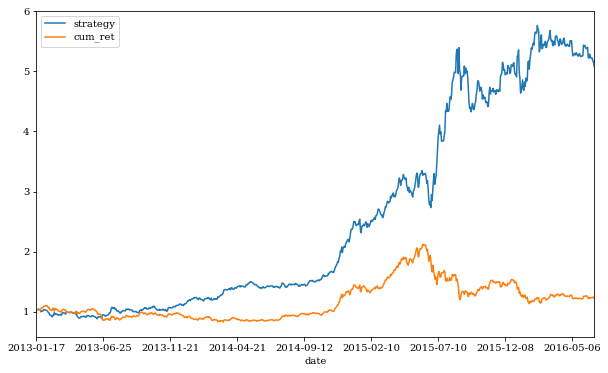

In [34]:
hs300[['strategy','cum_ret']].dropna().plot(figsize=(10,6))

## 改变算法：SVM

In [35]:
X_train = hs_7d

In [39]:
from sklearn.svm import SVC
clf_SVC = SVC(kernel = 'linear')

In [41]:
clf_SVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
clf_SVC.score(X_train, y_train)

0.5329341317365269

In [43]:
hs300['prediction'] = np.NaN
hs300['prediction'].ix[7:] = clf_SVC.predict(X_train)

In [44]:
hs300['strategy'] = (hs300['prediction'].shift(1)*hs300['return']+1).cumprod()
hs300['cum_ret'] = (hs300['return']+1).cumprod()

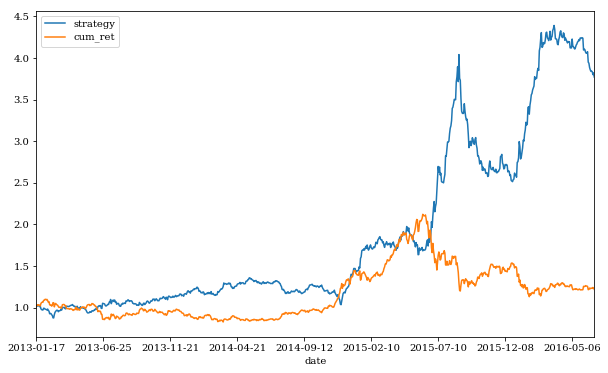

In [45]:
hs300[['strategy','cum_ret']].dropna().plot(figsize=(10,6))

## 逻辑回归算法在测试集上验证

In [46]:
hs300_test = ts.get_k_data('hs300', '2016-07-01', '2017-06-30')

In [47]:
hs300_test.set_index('date',inplace=True)

In [48]:
hs300_test['return'] = hs300_test['close'].pct_change()

In [49]:
hs300_test.dropna(inplace=True)

In [50]:
hs300_test.head()

,open,close,high,low,volume,code,return
date,,,,,,,
2016-07-04,3136.39,3204.70,3210.60,3134.02,133310529.0,hs300,0.016010
2016-07-05,3199.16,3207.38,3216.70,3198.00,130226895.0,hs300,0.000836
2016-07-06,3197.62,3216.80,3217.52,3183.45,124897458.0,hs300,0.002937
2016-07-07,3206.55,3209.95,3220.54,3190.12,118595202.0,hs300,-0.002129
2016-07-08,3199.75,3192.28,3204.93,3183.96,89734855.0,hs300,-0.005505


In [51]:
for i in range(1, 8):
    hs300_test['close-'+str(i)+'d'] = hs300_test['close'].shift(i)

In [52]:
hs_7d_test = hs300_test[[x for x in hs300_test.columns if 'close' in x]].iloc[7:]

In [53]:
hs_7d_test.head()

,close,close-1d,close-2d,close-3d,close-4d,close-5d,close-6d,close-7d
date,,,,,,,,
2016-07-13,3282.87,3273.18,3203.33,3192.28,3209.95,3216.80,3207.38,3204.70
2016-07-14,3276.76,3282.87,3273.18,3203.33,3192.28,3209.95,3216.80,3207.38
2016-07-15,3276.28,3276.76,3282.87,3273.18,3203.33,3192.28,3209.95,3216.80
2016-07-18,3262.02,3276.28,3276.76,3282.87,3273.18,3203.33,3192.28,3209.95
2016-07-19,3248.23,3262.02,3276.28,3276.76,3282.87,3273.18,3203.33,3192.28


In [54]:
X_test = hs_7d_test
X_test = sklearn.preprocessing.scale(X_test)
X_test

array([[-1.08385175, -1.17718433, -1.86756949, ..., -1.7231784 ,
        -1.81302536, -1.82902882],
       [-1.14374988, -1.0809843 , -1.16789753, ..., -1.79379854,
        -1.71531916, -1.80115163],
       [-1.14845546, -1.14164294, -1.07083495, ..., -1.97596758,
        -1.78636879, -1.70316541],
       ...,
       [ 2.47768491,  2.80920977,  2.78782839, ...,  2.10329923,
         1.70429417,  1.8009343 ],
       [ 2.69982755,  2.52577212,  2.85423963, ...,  2.12783587,
         2.13442964,  1.72624841],
       [ 2.67992686,  2.75073524,  2.56826061, ...,  2.46330731,
         2.1591155 ,  2.15761663]])

In [56]:
hs300_test['prediction'] = np.NaN
hs300_test['prediction'].ix[7:] = LR.predict(X_test)

In [57]:
hs300_test['prediction'].value_counts()

 1.0    135
-1.0    100
Name: prediction, dtype: int64

In [59]:
hs300_test['strategy'] = (hs300_test['prediction'].shift(1) * hs300_test['return'] +1).cumprod()
hs300_test['cum_ret'] = (hs300_test['return']+1).cumprod()

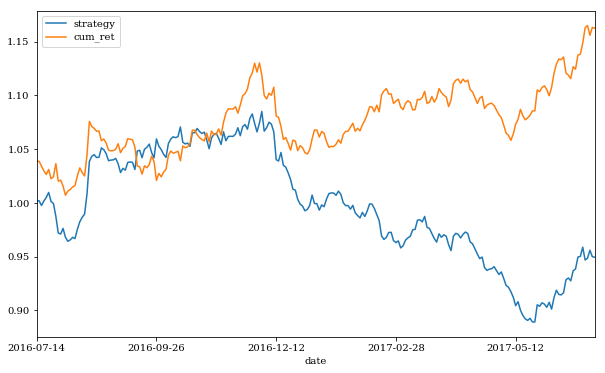

In [61]:
hs300_test[['strategy', 'cum_ret']].dropna().plot(figsize=(10,6))

## SVM算法在测试集上验证

In [68]:
X_test = hs_7d_test

In [69]:
hs300_test['prediciton'] = np.NaN
hs300_test['prediciton'].ix[7:] = clf_SVC.predict(X_test)

In [70]:
hs300_test['strategy'] = (hs300_test['prediction'].shift(1) * hs300_test['return'] + 1).cumprod()
hs300_test['cum_ret'] = (hs300_test['return'] + 1).cumprod()

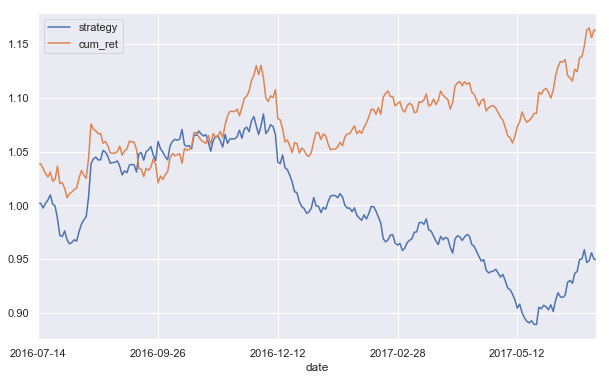

In [71]:
sns.set()
hs300_test[['strategy','cum_ret']].dropna().plot(figsize=(10, 6))